# TomoPy test 01
Reconstruction test on small TOMCAT dataset
06-11-2020

see also:
https://tomopy.readthedocs.io/en/latest/ipynb/tomopy.html

#### Activate TomoPy kernel in Jupyter:
`conda env list`

`source activate tomopy`

`python -m ipykernel install --user --name tomopy --display-name "Python3 (TomoPy)"`

`jupyter notebook &`

In [2]:
import dxchange
import tomopy
import numpy as np
import h5py
import matplotlib
import matplotlib.pyplot as plt

In [3]:
matplotlib.rcParams['figure.dpi'] = 300

In [4]:
import logging
logging.basicConfig(level=logging.INFO)

In [5]:
h5file = "/home/gianthk/Data/StefanFly_test/test_00_/test_00_.h5"
path_recon = "/home/gianthk/Data/StefanFly_test/test_00_/recon/"

#### Read TOMCAT data
- The .read_aps_32id() method of DXchange can read TOMCAT .h5 data
- If run without arguments (proj..), the import seem to be virtual (mem map)? I don't see this data in the RAM and I can reconstruct the whole volume on my laptop!

In [6]:
# read the full proj
projs, flats, darks, theta = dxchange.read_aps_32id(h5file, exchange_rank=0)

# read one projection every 10
# projs, flats, darks, theta = dxchange.read_aps_32id(h5file, exchange_rank=0, proj=[1, 1000, 10])

INFO:dxchange.reader:Data successfully imported: /home/gianthk/Data/StefanFly_test/test_00_/test_00_.h5
INFO:dxchange.reader:Data successfully imported: /home/gianthk/Data/StefanFly_test/test_00_/test_00_.h5
INFO:dxchange.reader:Data successfully imported: /home/gianthk/Data/StefanFly_test/test_00_/test_00_.h5
INFO:dxchange.reader:Data successfully imported: /home/gianthk/Data/StefanFly_test/test_00_/test_00_.h5


In [16]:
projs.shape[:]
# projs = projs[:,300:500,:]

(1001, 962, 960)

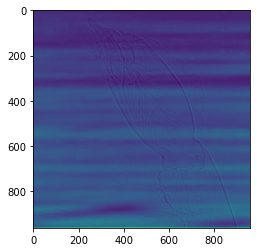

In [11]:
plt.imshow(projs[200, :, :])
plt.show()

If the angular information is not avaialable from the raw data you need to set the data collection angles. In this case, theta is set as equally spaced between 0-180 degrees.

In [12]:
if theta is None:
    theta = tomopy.angles(projs.shape[0])

#### Flat field correction

In [13]:
projs_norm = tomopy.normalize(projs, flats, darks)

#### Find the Center Of Rotation (auto)

In [18]:
COR = tomopy.find_center(projs_norm, theta, init=projs.shape[2]/2, ind=0, tol=0.5)

INFO:tomopy.recon.rotation:Trying rotation center: [480.]


Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...


INFO:tomopy.recon.rotation:Function value = 1.143882
INFO:tomopy.recon.rotation:Trying rotation center: [504.]
INFO:tomopy.recon.rotation:Function value = 1.179573
INFO:tomopy.recon.rotation:Trying rotation center: [456.]
INFO:tomopy.recon.rotation:Function value = 1.175795
INFO:tomopy.recon.rotation:Trying rotation center: [468.]


Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...


INFO:tomopy.recon.rotation:Function value = 1.150529
INFO:tomopy.recon.rotation:Trying rotation center: [492.]
INFO:tomopy.recon.rotation:Function value = 1.152108
INFO:tomopy.recon.rotation:Trying rotation center: [474.]
INFO:tomopy.recon.rotation:Function value = 1.138721
INFO:tomopy.recon.rotation:Trying rotation center: [468.]


Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...


INFO:tomopy.recon.rotation:Function value = 1.150529
INFO:tomopy.recon.rotation:Trying rotation center: [477.]
INFO:tomopy.recon.rotation:Function value = 1.137189
INFO:tomopy.recon.rotation:Trying rotation center: [480.]
INFO:tomopy.recon.rotation:Function value = 1.143882
INFO:tomopy.recon.rotation:Trying rotation center: [475.5]


Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...


INFO:tomopy.recon.rotation:Function value = 1.138193
INFO:tomopy.recon.rotation:Trying rotation center: [478.5]
INFO:tomopy.recon.rotation:Function value = 1.143143
INFO:tomopy.recon.rotation:Trying rotation center: [476.25]
INFO:tomopy.recon.rotation:Function value = 1.139069
INFO:tomopy.recon.rotation:Trying rotation center: [476.25]


Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...


INFO:tomopy.recon.rotation:Function value = 1.139069
INFO:tomopy.recon.rotation:Trying rotation center: [477.75]
INFO:tomopy.recon.rotation:Function value = 1.141448
INFO:tomopy.recon.rotation:Trying rotation center: [476.625]
INFO:tomopy.recon.rotation:Function value = 1.137959


Reconstructing 1 slice groups with 1 master threads...
Reconstructing 1 slice groups with 1 master threads...


#### Reconstruction with Gridrec

The COR from the step above seem to have an offset...

In [30]:
recon = tomopy.recon(projs_norm, theta, center=COR+10, algorithm='gridrec', sinogram_order=False)

Reconstructing 8 slice groups with 8 master threads...


Apply circular mask

In [32]:
recon = tomopy.circ_mask(recon, axis=0, ratio=0.95)

Visualize results

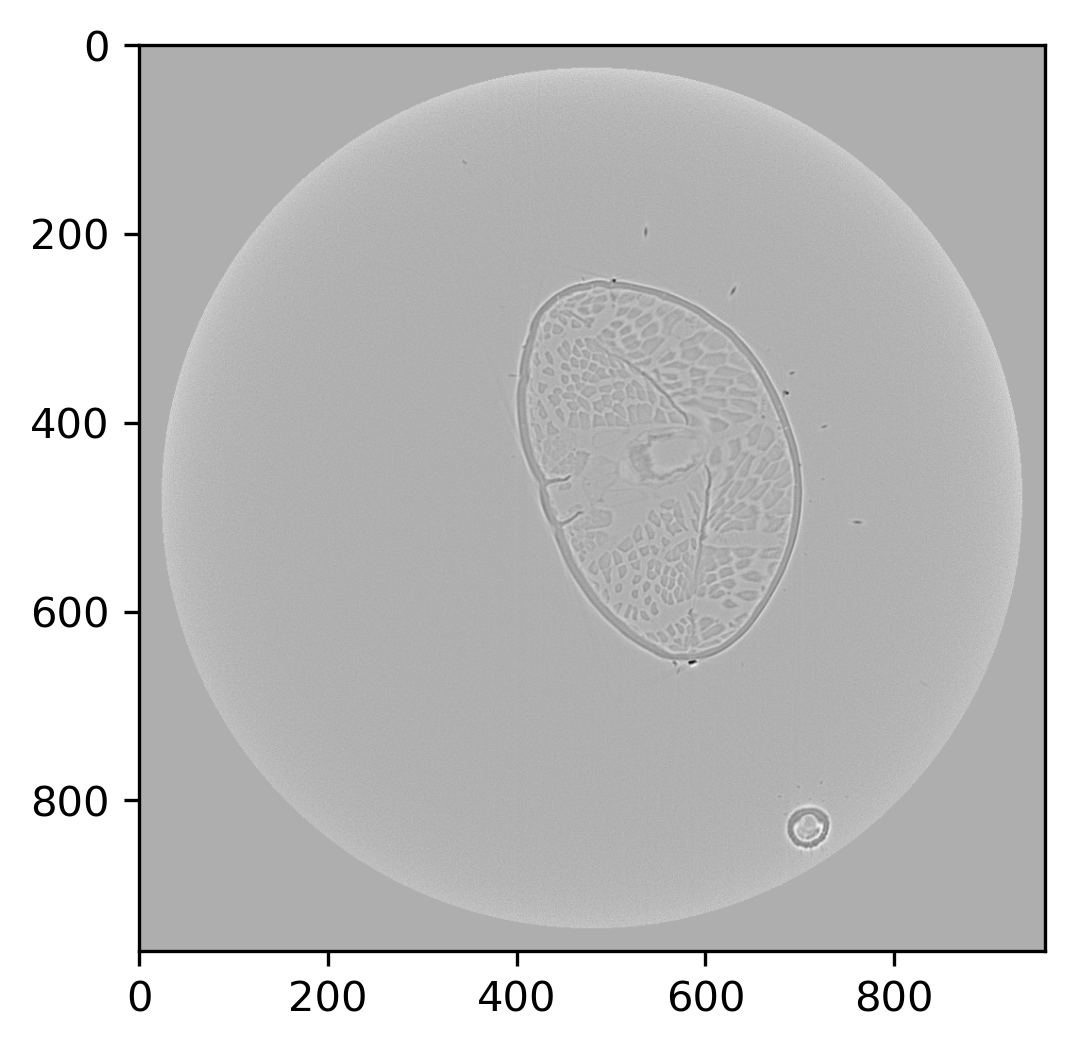

In [36]:
plt.imshow(recon[500, :, :], cmap='gray')
plt.show()

#### Write output Tiff stack

In [39]:
dxchange.writer.write_tiff_stack(recon, fname=path_recon+'data.tiff', dtype=None, axis=0, digit=5, start=0, overwrite=False)